In [1]:
from IPython.display import Image

# Combining all Spectra

https://www.cosmos.esa.int/web/xmm-newton/sas-thread-epic-merging

The source & background spectra were taken for each of the PN cameras for all 3 revolutions alongside their respective RMF and ARF files. The files for all the mos and pn cameras were moved into a separate directory where they were combined and plotted in xspec. 

## Revolution 301 

The code to generate the PN files is shown. For the mos data, this had already been generate previously, so was just renamed and moved into the other directory. 

### PN

In [ ]:
evselect table=EPIC_filt_time.fits expression='(FLAG==0) && (PATTERN<=4) && ((X,Y) IN circle(26229.662,27962.992,565.3))' withspectrumset=yes spectrumset=301_pn_source_spectrum.ds spectralbinsize=5 specchannelmin=0 specchannelmax=20479 energycolumn=PI


In [ ]:
backscale spectrumset=301_pn_source_spectrum.ds badpixlocation=EPIC_filt_time.fits

In [ ]:
evselect table=EPIC_filt_time.fits expression='(FLAG==0) && (PATTERN<=4) && ((X,Y) IN circle(29365.842,25855.344,712.9))' withspectrumset=yes spectrumset=301_pn_bkg_spectrum.ds spectralbinsize=5 specchannelmin=0 specchannelmax=20479 energycolumn=PI


In [ ]:
backscale spectrumset=301_pn_bkg_spectrum.ds badpixlocation=EPIC_filt_time.fits

In [ ]:
rmfgen spectrumset=301_pn_source_spectrum.ds rmfset=301_pn_response.rmf withenergybins=yes energymin=0.1 energymax=15 nenergybins=1490

In [ ]:
arfgen spectrumset=301_pn_source_spectrum.ds arfset=301_pn_arf.arf withrmfset=yes rmfset=301_pn_response.rmf 

### Combining all the cameras

For the mos data:

In [ ]:
epicspeccombine pha="301_mos1_source_spectrum.ds 301_mos2_source_spectrum.ds 302_mos1_source_spectrum.ds 302_mos2_source_spectrum.ds 303_mos1_source_spectrum.ds 303_mos2_source_spectrum.ds" bkg="301_mos1_bkg_spectrum.ds 301_mos2_bkg_spectrum.ds 302_mos1_bkg_spectrum.ds 302_mos2_bkg_spectrum.ds 303_mos1_bkg_spectrum.ds 303_mos2_bkg_spectrum.ds" rmf="301_mos1_response.rmf 301_mos2_response.rmf 302_mos1_response.rmf 302_mos2_response.rmf 303_mos1_response.rmf 303_mos2_response.rmf" arf="301_mos1_arf.arf 301_mos2_arf.arf 302_mos1_arf.arf 302_mos2_arf.arf 303_mos1_arf.arf 303_mos2_arf.arf" filepha="mos_source_all_revs.ds" filebkg="mos_bkg_all_revs.ds" filersp="mos_response_all_revs.rmf"

### Combined Spectra

##### PN

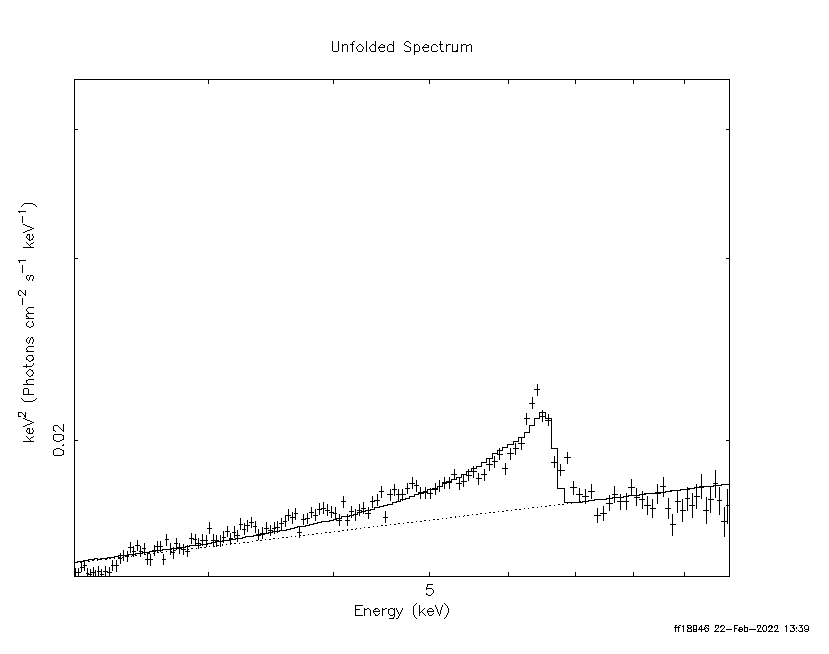

In [3]:
Image(filename="comb_figs/pn_combined_eeufs_laor2.png")

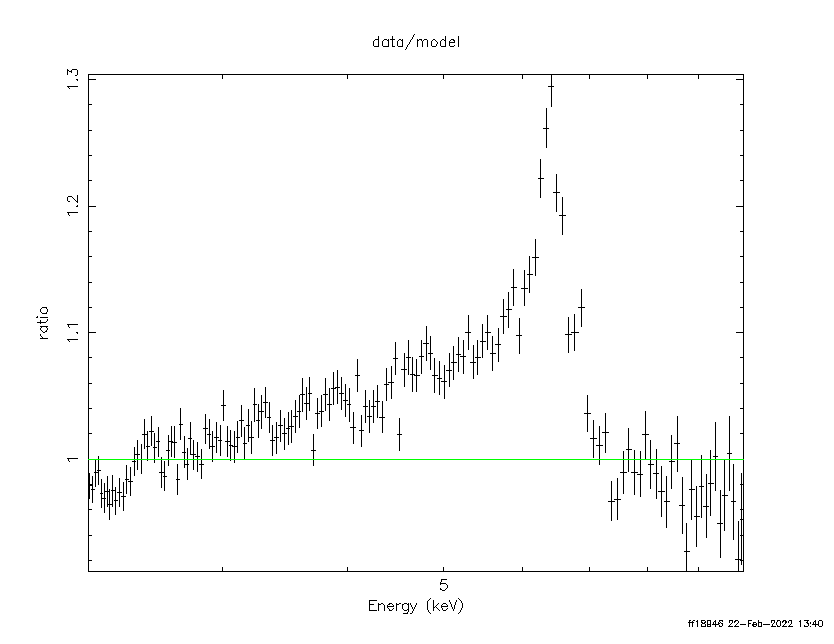

In [4]:
Image(filename="comb_figs/pn_combined_ratio.png")

##### MOS

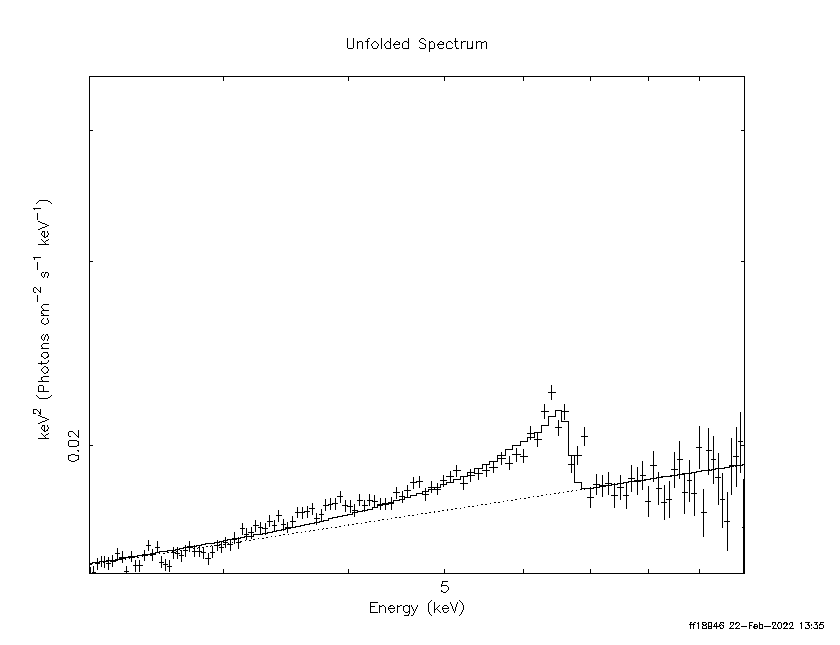

In [5]:
Image(filename="comb_figs/mos_combined_eeufs_laor2.png")

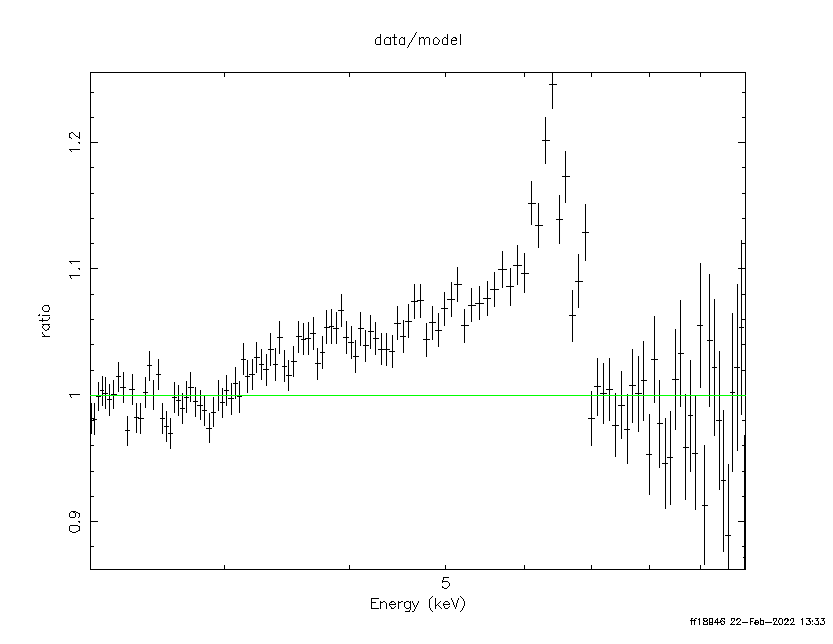

In [6]:
Image(filename="comb_figs/mos_combined_ratio.png")